# Pseudocode :
- Check the shape of your data - OK
- Check for data types - OK
- Check for missing values - OK
- clean dataset - OK
- Remove all spaces in the 'loan_status' column - OK
- Check if we have granular information - OK
- Drop the columns if we considere them irrelevants "loan_id" - OK
- For non-numerical columns, do dummies "education, self employed" - OK
- create the total asset values column - OK
- TARGET = Loan status (approuved or rejected) - OK
- Perform Train Test Split _ OK
- Model Selection = normalization _ OK
- Evaluate tools. accurecy, confusion matrix and performance metrics _ OK
- choose the model Classification  or regression - classification (categorical variables 'approuved' 'rejected'
- choose the algorithm - linear SVC or KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
loan_approval_df = pd.read_csv("loan_approval_dataset.csv")
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
#check the shape
loan_approval_df.shape

(4269, 13)

In [4]:
# check dtypes
loan_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loan_approval_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
# removing spaces in name columns
loan_approval_df.columns = loan_approval_df.columns.str.strip()
loan_approval_df.values

array([[1, 2, ' Graduate', ..., 22700000, 8000000, ' Approved'],
       [2, 0, ' Not Graduate', ..., 8800000, 3300000, ' Rejected'],
       [3, 3, ' Graduate', ..., 33300000, 12800000, ' Rejected'],
       ...,
       [4267, 2, ' Not Graduate', ..., 18100000, 7300000, ' Rejected'],
       [4268, 1, ' Not Graduate', ..., 14100000, 5800000, ' Approved'],
       [4269, 1, ' Graduate', ..., 35700000, 12000000, ' Approved']],
      dtype=object)

In [7]:
# Dummification
loan_approval_df = pd.get_dummies(loan_approval_df, columns=['education', 'self_employed'], drop_first=True)

In [8]:
print("Column names in the DataFrame:")
print(loan_approval_df.columns.tolist())

Column names in the DataFrame:
['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'education_ Not Graduate', 'self_employed_ Yes']


In [9]:
# Drop the 'loan_id' column because it's irrelevant (lab2)
loan_approval_df = loan_approval_df.drop(columns=['loan_id'])

In [10]:
loan_approval_df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,False,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,True,True
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,True,False
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,True,False


In [11]:
#create a column TOTAL ASSET VALUE
loan_approval_df['Total_Asset_Value'] = (
    loan_approval_df['residential_assets_value'] +
    loan_approval_df['commercial_assets_value'] +
    loan_approval_df['luxury_assets_value'] +
    loan_approval_df['bank_asset_value'])

In [12]:
# Remove all spaces in the 'loan_status' column
loan_approval_df['loan_status'] = loan_approval_df['loan_status'].str.replace(' ', '')

In [13]:
loan_approval_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes,Total_Asset_Value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,False,False,50700000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,True,True,17000000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,False,False,57700000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,False,False,52700000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,True,True,55000000


In [14]:
# train test split

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target
features = loan_approval_df.drop(columns=['loan_status'])
target = loan_approval_df['loan_status']

# Split the dataset for consistent testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3415, 12)
X_test shape: (854, 12)
y_train shape: (3415,)
y_test shape: (854,)


In [16]:
# Normalize
import numpy as np
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Train and evaluate normalized model
model_normalized = LogisticRegression()
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)
print("Accuracy with normalization:", accuracy_score(y_test, y_pred_normalized))

Accuracy with normalization: 0.9121779859484778


In [17]:
X_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,Total_Asset_Value
1675,5,7900000,29900000,6,568,5800000,13900000,15900000,8700000,True,False,44300000
1164,0,9600000,34000000,12,710,23800000,10300000,38100000,7800000,True,True,80000000
192,1,800000,2900000,8,682,2200000,1100000,2900000,700000,False,False,6900000
910,2,4900000,13100000,18,754,8200000,3300000,16500000,7200000,False,True,35200000
567,5,3000000,11100000,12,441,8500000,2500000,7300000,2000000,False,True,20300000


In [18]:
X_train_normalized

array([[1.        , 0.79381443, 0.75510204, ..., 1.        , 0.        ,
        0.48615725],
       [0.        , 0.96907216, 0.85969388, ..., 1.        , 1.        ,
        0.88150609],
       [0.2       , 0.06185567, 0.06632653, ..., 0.        , 0.        ,
        0.07198228],
       ...,
       [0.8       , 0.86597938, 0.51785714, ..., 1.        , 1.        ,
        0.61018826],
       [0.4       , 0.70103093, 0.53826531, ..., 1.        , 1.        ,
        0.3765227 ],
       [0.8       , 0.6185567 , 0.43367347, ..., 0.        , 0.        ,
        0.50055371]])

However, we can create Pandas DataFrames from Numpy arrays using pd.DataFrame() as shown below. Optionally, we can use the optional parameter index to keep the same row labels as in the X_train and X_test sets (index=X_train.index, index=X_test.index)

In [19]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index )
X_train_normalized.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,Total_Asset_Value
1675,1.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837,1.0,0.0,0.486157
1164,0.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612,1.0,1.0,0.881506
192,0.2,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619,0.0,0.0,0.071982
910,0.4,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796,0.0,1.0,0.385382
567,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054,0.0,1.0,0.220377


In [20]:
# Standardize
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Train and evaluate standardized model
model_standardized = LogisticRegression()
model_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = model_standardized.predict(X_test_standardized)
print("Accuracy with standardization:", accuracy_score(y_test, y_pred_standardized))

Accuracy with standardization: 0.905152224824356


Normalized Model Confusion Matrix:
[[501  35]
 [ 40 278]]

Normalized Model Performance:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
AUC-ROC: 0.97


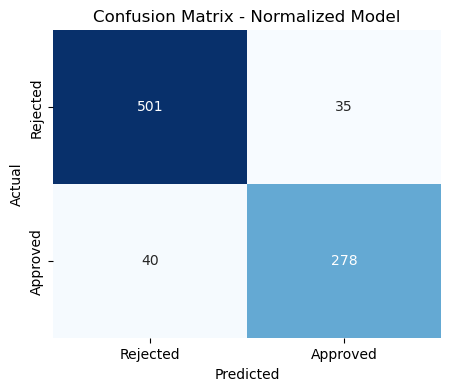


Standardized Model Confusion Matrix:
[[498  38]
 [ 43 275]]

Standardized Model Performance:
Accuracy: 0.91
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
AUC-ROC: 0.97


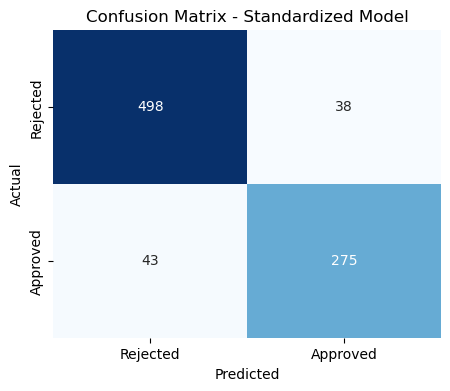

In [21]:
# Evaluate model's performance

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and your models have already been defined and trained
# Step 1: Make Predictions
y_pred_normalized = model_normalized.predict(X_test_normalized)  # Predictions for normalized model
y_pred_standardized = model_standardized.predict(X_test_standardized)  # Predictions for standardized model

# Step 2: Clean Up the Target Variable
y_test_cleaned = y_test.str.strip()  # Remove any leading/trailing spaces

# Step 3: Generate and Print Confusion Matrix for Normalized Model
cm_normalized = confusion_matrix(y_test_cleaned, y_pred_normalized)
print("Normalized Model Confusion Matrix:")
print(cm_normalized)

# Step 4: Calculate Performance Metrics for Normalized Model
accuracy_normalized = accuracy_score(y_test_cleaned, y_pred_normalized)
precision_normalized = precision_score(y_test_cleaned, y_pred_normalized, average='weighted', zero_division=0)
recall_normalized = recall_score(y_test_cleaned, y_pred_normalized, average='weighted', zero_division=0)
f1_normalized = f1_score(y_test_cleaned, y_pred_normalized, average='weighted', zero_division=0)
roc_auc_normalized = roc_auc_score(y_test_cleaned, model_normalized.predict_proba(X_test_normalized)[:, 1])

# Display metrics for the normalized model
print("\nNormalized Model Performance:")
print(f"Accuracy: {accuracy_normalized:.2f}")
print(f"Precision: {precision_normalized:.2f}")
print(f"Recall: {recall_normalized:.2f}")
print(f"F1 Score: {f1_normalized:.2f}")
print(f"AUC-ROC: {roc_auc_normalized:.2f}")

# Step 5: Visualize the Confusion Matrix for Normalized Model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_normalized, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Normalized Model")
plt.show()

# Step 6: Generate and Print Confusion Matrix for Standardized Model
cm_standardized = confusion_matrix(y_test_cleaned, y_pred_standardized)
print("\nStandardized Model Confusion Matrix:")
print(cm_standardized)

# Step 7: Calculate Performance Metrics for Standardized Model
accuracy_standardized = accuracy_score(y_test_cleaned, y_pred_standardized)
precision_standardized = precision_score(y_test_cleaned, y_pred_standardized, average='weighted', zero_division=0)
recall_standardized = recall_score(y_test_cleaned, y_pred_standardized, average='weighted', zero_division=0)
f1_standardized = f1_score(y_test_cleaned, y_pred_standardized, average='weighted', zero_division=0)
roc_auc_standardized = roc_auc_score(y_test_cleaned, model_standardized.predict_proba(X_test_standardized)[:, 1])

# Display metrics for the standardized model
print("\nStandardized Model Performance:")
print(f"Accuracy: {accuracy_standardized:.2f}")
print(f"Precision: {precision_standardized:.2f}")
print(f"Recall: {recall_standardized:.2f}")
print(f"F1 Score: {f1_standardized:.2f}")
print(f"AUC-ROC: {roc_auc_standardized:.2f}")

# Step 8: Visualize the Confusion Matrix for Standardized Model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_standardized, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Standardized Model")
plt.show()

1. Normalized Model
   
Confusion Matrix:
True Positives (TP): 278 (Approved and correctly predicted as approved)
True Negatives (TN): 501 (Rejected and correctly predicted as rejected)
False Positives (FP): 35 (Rejected but incorrectly predicted as approved)
False Negatives (FN): 40 (Approved but incorrectly predicted as rejected)

Performance Metrics:
Accuracy: 0.91 (91% of predictions were correct)
Precision: 0.91 (91% of predicted approvals were actual approvals)
Recall: 0.91 (91% of actual approvals were correctly predicted)
F1 Score: 0.91 (Harmonic mean of precision and recall)
AUC-ROC: 0.97 (Indicates excellent performance in distinguishing between classes)

2. Standardized Model
   
Confusion Matrix 275]]
True Positives (TP): 275 (Approved and correctly predicted as approved)
True Negatives (TN): 498 (Rejected and correctly predicted as rejected)
False Positives (FP): 38 (Rejected but incorrectly predicted as approved)
False Negatives (FN): 43 (Approved but incorrectly predicted as
 rejected)
Performane Metrics:

Accuracy: 0.91 (91% of predictions were correct)
Precision: 0.90 (90% of predicted approvals were actual approvals)
Recall: 0.91 (91% of actual approvals were correctly predicted)
F1 Score: 0.90 (Harmonic mean of precision and recall)
AUC-ROC: 0.97 (Indicates excellent performance in distinguishing between classes)

In [ ]:
Performance Comparison:
Both models have similar accuracy around 91%, indicating they are performing well.
The normalized model slightly outperforms the standardized model in terms of precision (0.91 vs. 0.90), while recall remains exactly the same for both (0.91).
The F1 scores are also very close, further validating the consistency between the two approaches.

Normalized Model Confusion Matrix:
[[449  22]
 [ 11 799]]

Normalized Model Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
AUC-ROC: 1.00


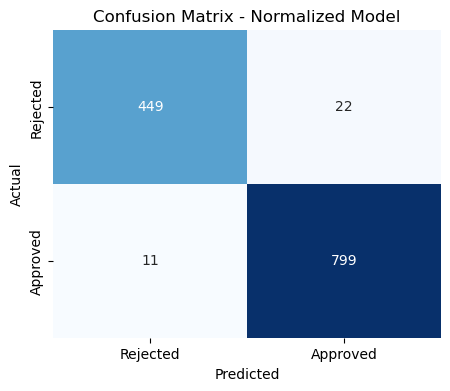


Standardized Model Confusion Matrix:
[[449  22]
 [ 11 799]]

Standardized Model Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
AUC-ROC: 1.00


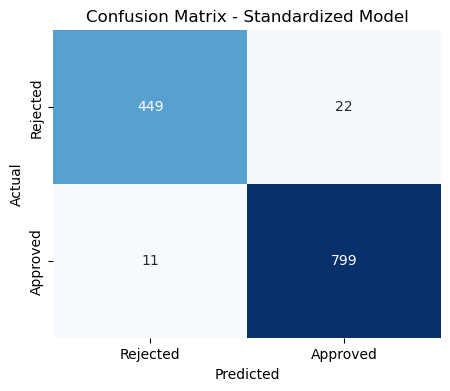

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Normalization
scaler_norm = MinMaxScaler()
X_train_normalized = scaler_norm.fit_transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Apply Standardization
scaler_std = StandardScaler()
X_train_standardized = scaler_std.fit_transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

# Train models
model_normalized = RandomForestClassifier(random_state=42)
model_normalized.fit(X_train_normalized, y_train)

model_standardized = RandomForestClassifier(random_state=42)
model_standardized.fit(X_train_standardized, y_train)

# Evaluation
# Step 1: Make Predictions
y_pred_normalized = model_normalized.predict(X_test_normalized)  # Predictions for normalized model
y_pred_standardized = model_standardized.predict(X_test_standardized)  # Predictions for standardized model

# Step 2: Generate and Print Confusion Matrix for Normalized Model
cm_normalized = confusion_matrix(y_test, y_pred_normalized)
print("Normalized Model Confusion Matrix:")
print(cm_normalized)

# Step 3: Calculate Performance Metrics for Normalized Model
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
precision_normalized = precision_score(y_test, y_pred_normalized, zero_division=0)
recall_normalized = recall_score(y_test, y_pred_normalized, zero_division=0)
f1_normalized = f1_score(y_test, y_pred_normalized, zero_division=0)
roc_auc_normalized = roc_auc_score(y_test, model_normalized.predict_proba(X_test_normalized)[:, 1])

# Display metrics for the normalized model
print("\nNormalized Model Performance:")
print(f"Accuracy: {accuracy_normalized:.2f}")
print(f"Precision: {precision_normalized:.2f}")
print(f"Recall: {recall_normalized:.2f}")
print(f"F1 Score: {f1_normalized:.2f}")
print(f"AUC-ROC: {roc_auc_normalized:.2f}")

# Step 4: Visualize the Confusion Matrix for Normalized Model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_normalized, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Normalized Model")
plt.show()

# Step 5: Generate and Print Confusion Matrix for Standardized Model
cm_standardized = confusion_matrix(y_test, y_pred_standardized)
print("\nStandardized Model Confusion Matrix:")
print(cm_standardized)

# Step 6: Calculate Performance Metrics for Standardized Model
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
precision_standardized = precision_score(y_test, y_pred_standardized, zero_division=0)
recall_standardized = recall_score(y_test, y_pred_standardized, zero_division=0)
f1_standardized = f1_score(y_test, y_pred_standardized, zero_division=0)
roc_auc_standardized = roc_auc_score(y_test, model_standardized.predict_proba(X_test_standardized)[:, 1])

# Display metrics for the standardized model
print("\nStandardized Model Performance:")
print(f"Accuracy: {accuracy_standardized:.2f}")
print(f"Precision: {precision_standardized:.2f}")
print(f"Recall: {recall_standardized:.2f}")
print(f"F1 Score: {f1_standardized:.2f}")
print(f"AUC-ROC: {roc_auc_standardized:.2f}")

# Step 7: Visualize the Confusion Matrix for Standardized Model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_standardized, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Standardized Model")
plt.show()